# Billboard EDA IV

# This is where I'll streamline the process for the Gini analysis. I'll be using the "gini_two' equation I worked on with Taylor. 

In [1]:
# Packages & Settings


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [3]:
# converting WeekID to datetime
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
billboard_df.head(200)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5
5,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6
6,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7
7,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8
8,http://www.billboard.com/charts/hot-100/1990-0...,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9
9,http://www.billboard.com/charts/hot-100/1990-0...,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10


In [5]:
# renaming columns to python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [6]:
#creating date/month/day/year columns


billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year


In [7]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [8]:
# replacing artist names
# at some point I gotta figure out how to deal with "Janet Jackson" vs "Janet"

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 

In [9]:
# Creating "chart-points" variable (formerly known as "week-points") 
#The Gini function needs week_points to be a float to run. 

billboard_df['chart_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1).astype(float)
billboard_df['weeks_on_chart'] = billboard_df['weeks_on_chart'].astype(float)

In [10]:
#Groupbys for chart-points Gini analysis

song_id_points_yearly_groupby_df = billboard_df.groupby(['song_id', 'year']).chart_points.sum().reset_index()
performer_points_yearly_groupby_df = billboard_df.groupby(['performer', 'year']).chart_points.sum().reset_index()

In [11]:
# Defining Gini function

def gini_function(series):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = series.to_numpy().flatten() #all values are treated equally, arrays must be 1d

    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient 

In [12]:
#creating gini DF's for chart point analysis
song_id_points_gini_df = song_id_points_yearly_groupby_df.groupby('year').agg({'chart_points':gini_function})
performer_points_gini_df = performer_points_yearly_groupby_df.groupby('year').agg({'chart_points':gini_function})


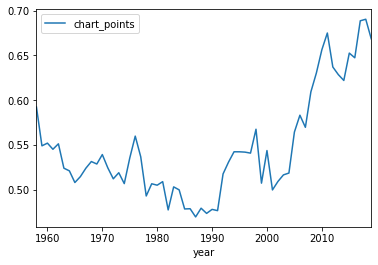

In [13]:
song_id_points_gini_df.plot()

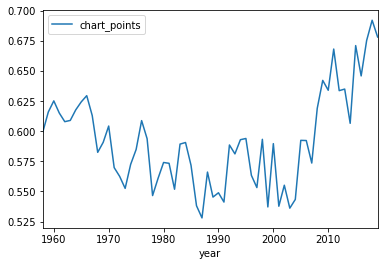

In [14]:
performer_points_gini_df.plot()

In [15]:
# creating initial DFs for Gini "weeks on chart" analysis
song_id_weeks_yearly_groupby_df = billboard_df.groupby(['song_id', 'year']).weeks_on_chart.sum().reset_index()
performer_weeks_yearly_groupby_df = billboard_df.groupby(['performer', 'year']).weeks_on_chart.sum().reset_index()


In [16]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,chart_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1.0,1990-02-10,2,10,1990,26.0
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2.0,1990-02-17,2,17,1990,48.0
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3.0,1990-02-24,2,24,1990,58.0
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4.0,1990-03-03,3,3,1990,64.0
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5.0,1990-03-10,3,10,1990,74.0


In [17]:
#creating gini DF's for weeks on chart analysis
song_id_weeks_gini_df = song_id_weeks_yearly_groupby_df.groupby('year').agg({'weeks_on_chart':gini_function})
performer_weeks_gini_df = performer_weeks_yearly_groupby_df.groupby('year').agg({'weeks_on_chart':gini_function})

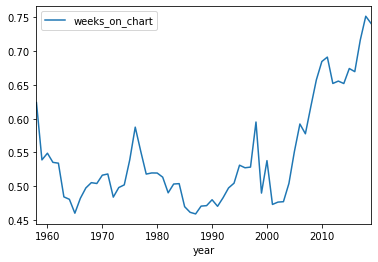

In [18]:
song_id_weeks_gini_df.plot()

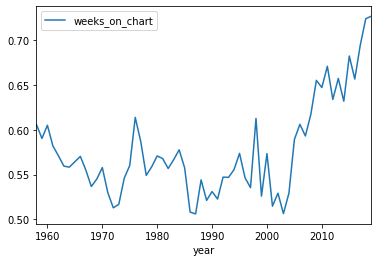

In [19]:
performer_weeks_gini_df.plot()

# ok this is the end of "streamlined GINI stuff". I'll check in with an instructor on how to proceed with this stuff. 

## Thoughts about this portion: 

#1) Is there an easier way to express "equality?" Market share of top X artists/songs?
#2) The non-adjusted Gini might not be as appropriate for songs, since a single song's hypothetical maximum market share can be 100/5100 = 1.96%, whereas an artist could hypothetically have 100% of market share. It's still a measure of area under a curve (Lorenz) so I don't think that's a big deal. Just something to keep in mind if an economics person ever sees this. 
#3) The thing that jumps out is the volatility of the functions. It looks like volatility of financial assets are analyzed with standard deviation and variance: maybe that's the way to go? 
#4) Taylor recommended snapshots of the min and max values. I'll probably postpone that until I've done my "regex", but seems like a useful storytelling tool. 
#5) I'm intrigued by the idea of Jaccard similarity, but let's put that to the side for now. 
#6) would a scatter plot actually be better? I'm not super concerned with yearly trends, especially since the chart would be smoother if I did this on a monthly or weekly basis. 

In [20]:
#Resetting indices: not sure if I'll keep this step
song_id_points_gini_df = song_id_points_gini_df.reset_index()
performer_points_gini_df = performer_points_gini_df.reset_index()
song_id_weeks_gini_df = song_id_weeks_gini_df.reset_index()
performer_weeks_gini_df = performer_weeks_gini_df.reset_index()

In [21]:
performer_points_gini_df.chart_points.describe()

count    62.000000
mean      0.592425
std       0.039246
min       0.528047
25%       0.562719
50%       0.590694
75%       0.615726
max       0.692076
Name: chart_points, dtype: float64

In [22]:


X = song_id_points_gini_df["year"] ## X usually means our input variables (or independent variables)
y = song_id_points_gini_df["chart_points"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           chart_points   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     31.39
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           5.60e-07
Time:                        14:17:13   Log-Likelihood:                 101.28
No. Observations:                  62   AIC:                            -198.6
Df Residuals:                      60   BIC:                            -194.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2504      0.678     -4.796      0.000      -4.606      -1.895
year           0.0019      0.000      5.603      0.000       0.001       0.003
==============================================================================
Omnibus:                        4.302   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                2.140
Skew:                           0.144   Prob(JB):                        0.343
Kurtosis:                       2.137   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
song_id_points_gini_df.loc[song_id_points_gini_df['chart_points'].idxmax()]

year            2018.000000
chart_points       0.690502
Name: 60, dtype: float64

In [24]:
song_id_points_gini_df.loc[song_id_points_gini_df['chart_points'].idxmin()]

year            1987.000000
chart_points       0.469436
Name: 29, dtype: float64

In [25]:
performer_points_gini_df.loc[performer_points_gini_df['chart_points'].idxmax()]

year            2018.000000
chart_points       0.692076
Name: 60, dtype: float64

In [26]:
performer_points_gini_df.loc[performer_points_gini_df['chart_points'].idxmin()]

year            1987.000000
chart_points       0.528047
Name: 29, dtype: float64

In [27]:
song_id_weeks_gini_df.loc[song_id_weeks_gini_df['weeks_on_chart'].idxmax()]

year              2018.000000
weeks_on_chart       0.751806
Name: 60, dtype: float64

In [28]:
song_id_weeks_gini_df.loc[song_id_weeks_gini_df['weeks_on_chart'].idxmin()]

year              1987.000000
weeks_on_chart       0.458862
Name: 29, dtype: float64

In [29]:
performer_weeks_gini_df.loc[performer_weeks_gini_df['weeks_on_chart'].idxmax()]

year              2019.000000
weeks_on_chart       0.726756
Name: 61, dtype: float64

In [30]:
performer_weeks_gini_df.loc[performer_weeks_gini_df['weeks_on_chart'].idxmin()]

year              1987.000000
weeks_on_chart       0.506033
Name: 29, dtype: float64

In [38]:
song_id_points_gini_df.head()

,year,chart_points
0,1958,0.592281
1,1959,0.548940
2,1960,0.551948
3,1961,0.545088
4,1962,0.551200


# So by the Gini analysis, 1987 is universally the "most equitable" year, and 2018 or 2019 is the "least equitable" year.

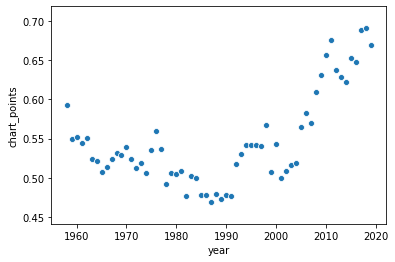

In [31]:
# Scatter plots for Gini- might be better than the line charts.

ax = sns.scatterplot(x="year", y = "chart_points", data=song_id_points_gini_df)

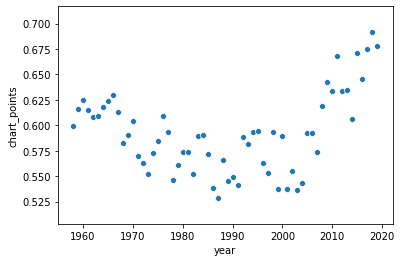

In [32]:
ax = sns.scatterplot(x="year", y = "chart_points", data=performer_points_gini_df)

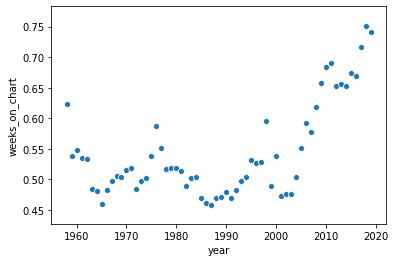

In [33]:
ax = sns.scatterplot(x="year", y = "weeks_on_chart", data=song_id_weeks_gini_df)

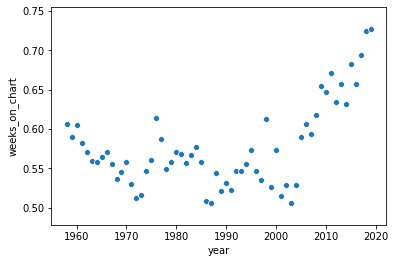

In [34]:
ax = sns.scatterplot(x="year", y = "weeks_on_chart", data=performer_weeks_gini_df)

# I'll run this by an instructor, but I think the scatter plots are a little more straightforward. 

## note: since everything is curving in a similar way, it might be fun to plot multiple things alongside each other.

## note: it might also be fun to make a dataframe by year with all the different Gini calculations, so I can calculate correlations. It seems like all of these charts look the same

In [35]:
eighty_seven_df = billboard_df[billboard_df['year'].isin([1987])].sort_values(by=['week_id'], ascending=True)

In [36]:
eighty_seven_df.head(500)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,chart_points
225514,1987-01-03,14,Victory,Kool & The Gang,VictoryKool & The Gang,1,14.0,14,10.0,1987-01-03,1,3,1987,87.0
61443,1987-01-03,49,I'll Be Alright Without You,Journey,I'll Be Alright Without YouJourney,1,49.0,49,5.0,1987-01-03,1,3,1987,52.0
54011,1987-01-03,40,Stop To Love,Luther Vandross,Stop To LoveLuther Vandross,1,40.0,40,8.0,1987-01-03,1,3,1987,61.0
61836,1987-01-03,52,Jimmy Lee,Aretha Franklin,Jimmy LeeAretha Franklin,1,52.0,52,5.0,1987-01-03,1,3,1987,49.0
199911,1987-01-03,63,Brand New Lover,Dead Or Alive,Brand New LoverDead Or Alive,1,63.0,63,6.0,1987-01-03,1,3,1987,38.0
62119,1987-01-03,54,I Need Your Loving,The Human League,I Need Your LovingThe Human League,1,54.0,54,5.0,1987-01-03,1,3,1987,47.0
252340,1987-01-03,78,Welcome To The Boomtown,David & David,Welcome To The BoomtownDavid & David,1,78.0,37,14.0,1987-01-03,1,3,1987,23.0
199152,1987-01-03,55,Caught Up In The Rapture,Anita Baker,Caught Up In The RaptureAnita Baker,1,55.0,55,6.0,1987-01-03,1,3,1987,46.0
131864,1987-01-03,99,Freedom Overspill,Steve Winwood,Freedom OverspillSteve Winwood,1,99.0,20,15.0,1987-01-03,1,3,1987,2.0
198593,1987-01-03,50,Big Time,Peter Gabriel,Big TimePeter Gabriel,1,50.0,50,6.0,1987-01-03,1,3,1987,51.0


In [37]:
song_id_points_yearly_groupby_df.head(200)

,song_id,year,chart_points
0,"""B"" GirlsYoung And Restless",1990,450.0
1,"""Cherry Cherry"" from Hot August NightNeil Diamond",1973,531.0
2,"""Having A Party"" MedleyThe Ovations (Featuring...",1973,225.0
3,"""Joy"" Pt. IIsaac Hayes",1973,68.0
4,"""Joy"" Pt. IIsaac Hayes",1974,461.0
5,"""Roots"" MedleyQuincy Jones",1977,213.0
6,"""Yep!""Duane Eddy His Twangy Guitar And The Rebels",1959,402.0
7,#1 Dee JayGoody Goody,1978,53.0
8,#1Nelly,2001,669.0
9,#1Nelly,2002,549.0
